# <img src="https://img.icons8.com/dusk/64/000000/artificial-intelligence.png" style="height:50px;display:inline"> EE 046202 - Technion - Unsupervised Learning & Data Analysis
---
#### Tal Daniel

## Tutorial 05 - Dimensionality Reduction - Principle Component Analysis (PCA), Kernels & KPCA
---

### <img src="https://img.icons8.com/bubbles/100/000000/checklist.png" style="height:50px;display:inline"> Agenda
---
* [Motivation- Why Dimensionality Reduction?](#-Motivation--Why-Dimensionality-Reduction?)
* [Dimensionality Reduction](#-Dimensionality-Reduction)
* [Principal Component Analysis (PCA) Recap](#-Principal-Component-Analysis-(PCA))
    * [PCA Algorithm](#-PCA-Algorithm)
    * [PCA for Compression](#-PCA-for-Compression)
    * [The Transpose Trick](#-The-Transpose-Trick)
    * [Relation to SVD (Singular Value Decomposition)](#-The-Relationship-Between-PCA-&-SVD)
* [Kernels Motivation ](#-Kernels-Motivation)
* [The Kernel Trick](#-The-Kernel-Trick)
* [NLPCA- Nonlinear PCA](#Nonlinear-PCA---NLPCA-(&-Kernel-PCA))
    * [Kernel PCA](#-Kernel-PCA)
* [Recommended Videos](#-Recommended-Videos)
* [Credits](#-Credits)

In [1]:
# imports for the tutorial
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA, KernelPCA
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_circles, make_moons
%matplotlib notebook

## <img src="https://img.icons8.com/dusk/64/000000/confetti.png" style="height:50px;display:inline"> Motivation- Why Dimensionality Reduction?
---
* Discover Hidden Correlation/Topics - when we reduce dimensions, we sometimes discover correlation between features
    * For example, we can notice two features that occur commonly together
    * *Anomaly Detection*
* Remove Redundant and Noisy Features
    * Not all features are useful and sometimes harm the performance
* Interpretation & Visualization
    * For example, when we reduce n-dimensional features to 2 or 3, we can plot them and see the relationship with our eyes
* Easier Storage and Processing of the Data
    * Reduces time and space complexity
    * Yields a more optimized process
* Alleviates **The Curse of Dimensionality**
    * Fewer dimensions $\rightarrow$ less chance of *overfitting* $\rightarrow$ better generalization.

## <img src="https://img.icons8.com/dusk/64/000000/negative-dynamic.png" style="height:50px;display:inline"> Dimensionality Reduction
---
* Dimensionality reduction is the process of reducing the dimensionality of the feature space with consideration by obtaining a set of principal features. 
    * Dimensionality reduction can be further broken into feature selection and feature extraction.
* Dimensionality Reduction vs. **Feature Selection**
    * Differs from feature selection in 2 ways:
        1. Instead of choosing subset of features, it creates new features (dimensions) defined as functions over all features
        2. Does not consider class labels, just data points
* Main Idea:
    * Given data points in **d**-dimensional space
    * Project the data points into lower dimensional space while **preserving as much information as possible**
        * For example, find the best 2-D approximation to 3/4/104-D data
    * In particular, choose the projection that minimizes the squared error in reconstruction of the original data

## <img src="https://img.icons8.com/dusk/64/000000/zoom-to-extents.png" style="height:50px;display:inline"> Principal Component Analysis (PCA)
---
PCA is a method for reducing the dimensionality of data.

It uses simple matrix operations from linear algebra and statistics to calculate a projection of the original data into the same number or fewer dimensions.

We can define 2 goals PCA wishes to achieve:
1. Find linearly independent dimensions (or basis of views) which can losslessly represent the data points.
2. Those newly found dimensions should allow us to predict/reconstruct the original dimensions. **The reconstruction/projection error should be minimized.**

* More formally, PCA finds a new set of dimensions (or a set of basis of views) such that all the dimensions are **orthogonal** (and hence linearly independent) and ranked according to the variance of data along them.
* It means that the more important principal axis occurs first (more important = more variance/more spread out data).

Recap of some basics:
* **Variance** - a measure of the variability. Mathematically, it is the average squared deviation from the mean score. We use the following formula to compute variance: $var(x) = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu_x)^2$ where $\mu_x$ is the mean.
* **Covaraince** - a measure of the extent to which corresponding elements from two sets of ordered data move in the same direction. We use the following formula to compute variance: $cov(x, y) = \frac{1}{N}\sum_{i=1}^{N}(x_i - \mu_x)(y_i-\mu_y)$. Replace $\frac{1}{N}$ with $\frac{1}{N-1}$ for the *unbiased* estimation.
* **Covariance matrix** - includes the variance of dimensions on the main diagonal and the rest is the covariance between dimensions. If we have $N$ data points (samples) with $d$ dimensions for each sample and $X$ is an $dxN$ matrix, then:
$Cov(X) = \frac{1}{N}(X-\mu_X)(X-\mu_X)^T$ (in PCA, we wish this matrix to be diagonal). We assume the data is centered, thus: $Cov(X) = \frac{1}{N}XX^T$. Replace $\frac{1}{N}$ with $\frac{1}{N-1}$ for the *unbiased* estimation.

* In the PCA case, multiplying by $\frac{1}{N-1}$ will not have much effect on the result, so in the following we will skip this step.

### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:50px;display:inline"> PCA Intuition 
---
<img src="./assets/tut_xi_pca_1.jpg" style="height:200px">

* Consider the variance along direction $v$ (projection) among all the orange points: $$var(v) = \sum_{\textit{orange points x}} ||(x - \overline{x})\cdot v||^2 $$
* What is the unit vector $v$ that **minimizes** the variance?
    * $\min_{v} (var(v)) = v_2$
* What is the unit vector $v$ that **maximizes** the variance?
    * $\max_{v} (var(v)) = v_1$

* $var(v) = var((x -\overline{x})^T\cdot v) = \sum_x ||(x -\overline{x})^T\cdot v ||^2 = \sum_x v^T(x -\overline{x})(x -\overline{x})^Tv = v^T\big[\sum_x (x -\overline{x})(x -\overline{x})^T \big]v = v^T A v$
* Formally: $$\max v^T Av$$  $$\textit{s.t   } ||v||= 1$$, where $A = \sum_x (x-\overline{x})(x-\overline{x})^T = (X - \overline{X})(X - \overline{X})^T $

* **Solution**:
    * $v_1$ is eigenvector of A with the **largest** eigenvalue
    * $v_2$ is eigenvector of A with the **smallest** eigenvalue

### <img src="https://img.icons8.com/dusk/64/000000/flow-chart.png" style="height:50px;display:inline"> PCA Algorithm
---
1. **Normalize/Standartize** (<a style="color:Tomato">if we use features of different scales, we may get misleading components</a>) and center the data. Given data $X \in \mathcal{R}^{m \times N}$, where $m$ is the number of features and $N$ is the number of samples, normalization: $$ \tilde{X} = X - \overline{X} $$ Standartization: $$ \tilde{X} = \frac{X - \overline{X}}{\overline{\sigma}_x} $$ Where $\overline{\sigma}_x$ is the empirical standard deviation (the square root of the empirical variance).
2. Calculate the empirical covariance matrix $X$ of data points: $$ P = \tilde{X}\tilde{X}^T \in \mathcal{R}^{m \times m} $$ 
    * Note that it is usually better to normalize: $$ P = \frac{1}{N-1} \tilde{X}\tilde{X}^T $$
3. Calculate eigenvectors and corresponding eigenvalues.
4. Sort the eigenvectors according to their eigenvalues in decreasing order.
5. Choose first $k$ largest eigenvectors and that will be the new $k$ dimensions.
6. Transform the original $d$ dimensional data points into $k$ dimensions.

### <img src="https://img.icons8.com/dusk/64/000000/classroom.png" style="height:50px;display:inline"> Example - PCA on Breast Cancer Dataset
---
#### <img src="https://img.icons8.com/nolan/64/000000/treatment-plan.png" style="height:30px;display:inline" /> The Breast Cancer Wisconsin (Diagnostic) Data Set

This dataset contains features of breast cancer and classify them to benign/malignant.
Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

* We will take the first 3 features, and reduce the dimensionality to 2 using PCA. 

In [2]:
# load the data
dataset = pd.read_csv('./datasets/cancer_dataset.csv')
# print the number of rows in the data set
number_of_rows = len(dataset)
print('Number of rows in the dataset: {}'.format(number_of_rows))
## Show a sample 10 rows
dataset.sample(10)

Number of rows in the dataset: 569


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
37,854941,B,13.03,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.02923,...,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169,NaN
485,913063,B,12.45,16.41,82.85,476.7,0.09514,0.15110,0.15440,0.04846,...,21.03,97.82,580.6,0.11750,0.40610,0.48960,0.13420,0.3231,0.10340,NaN
116,864726,B,8.95,15.76,58.74,245.2,0.09462,0.12430,0.09263,0.02308,...,17.07,63.34,270.0,0.11790,0.18790,0.15440,0.03846,0.1652,0.07722,NaN
214,8810955,M,14.19,23.81,92.87,610.7,0.09463,0.13060,0.11150,0.06462,...,34.85,115.00,811.3,0.15590,0.40590,0.37440,0.17720,0.4724,0.10260,NaN
27,852781,M,18.61,20.25,122.10,1094.0,0.09440,0.10660,0.14900,0.07731,...,27.26,139.90,1403.0,0.13380,0.21170,0.34460,0.14900,0.2341,0.07421,NaN
407,905190,B,12.85,21.37,82.63,514.5,0.07551,0.08316,0.06126,0.01867,...,27.01,91.63,645.8,0.09402,0.19360,0.18380,0.05601,0.2488,0.08151,NaN
461,911296202,M,27.42,26.27,186.90,2501.0,0.10840,0.19880,0.36350,0.16890,...,31.37,251.20,4254.0,0.13570,0.42560,0.68330,0.26250,0.2641,0.07427,NaN
161,8711803,M,19.19,15.94,126.30,1157.0,0.08694,0.11850,0.11930,0.09667,...,17.81,146.60,1495.0,0.11240,0.20160,0.22640,0.17770,0.2443,0.06251,NaN
462,9113156,B,14.40,26.99,92.25,646.1,0.06995,0.05223,0.03476,0.01737,...,31.98,100.40,734.6,0.10170,0.14600,0.14720,0.05563,0.2345,0.06464,NaN
264,889719,M,17.19,22.07,111.60,928.3,0.09726,0.08995,0.09061,0.06527,...,29.33,140.50,1436.0,0.15580,0.25670,0.38890,0.19840,0.3216,0.07570,NaN


In [3]:
# take only the first 3 features
x = dataset[['radius_mean', 'texture_mean', 'perimeter_mean']].values
# standartize the data (centering and normalizing), features of different scale!
# note: you can also use scikit-learn's StandardScaler()
x -= x.mean(axis=0, keepdims=True)
x /= x.std(axis=0, keepdims=True)
# calculate the covariance matrix
A = x.T @ x  # x in [N x m]
# calculate eigenvalues and eigenvectors
# NOT ordered in decreasing order
d, v = np.linalg.eig(A)
# sort by decreasing order
v = v[:,np.argsort(-d)]
d = d[np.argsort(-d)]
print("eigenvalues:")
print(d.astype(np.float16))
# the reconstruction of x would be x ~ X @ V @ V.T
# take the 2 most dominant directions
print("projection - dimension reduction (3 to 2):")
x_proj = x @ v[:, :-1]
print(x_proj)

eigenvalues:
[1.24e+03 4.66e+02 1.21e+00]
projection - dimension reduction (3 to 2):
[[-0.80196001  2.54048135]
 [-2.18555934  1.23675759]
 [-2.23789966  0.38704729]
 ...
 [-1.65154304 -1.54971556]
 [-3.36804781 -1.19009381]
 [ 1.93933426 -2.07217819]]


In [4]:
def plot_pca():
    # plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
#     ax.axis('equal')
    ax.set_xlabel('radius_mean',)
    ax.set_ylabel('texture_mean')
    ax.set_zlabel('perimeter_mean')
    ax.plot(x[:, 0], x[:, 1], x[:, 2], '.', markersize=3)
    ax.plot([0, v[0, 0]], [0, v[1, 0]], [0, v[2, 0]], 'r') # most dominant eigenvector
    ax.plot([0, v[0, 1]], [0, v[1, 1]], [0, v[2, 1]], 'g')
    ax.plot([0, v[0, 2]], [0, v[1, 2]], [0, v[2, 2]], 'b')

<IPython.core.display.Javascript object>


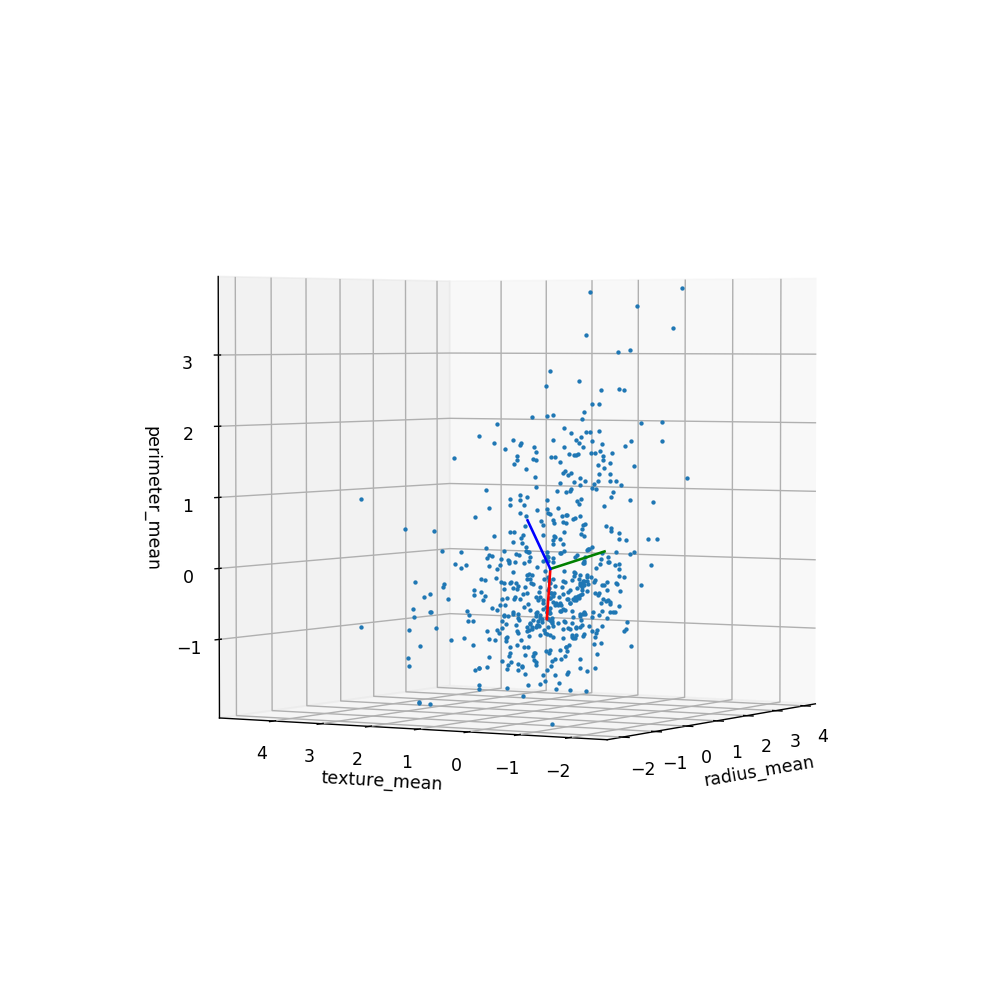

In [5]:
%matplotlib notebook
plot_pca()

In [6]:
# using scikit-learn
scaler = StandardScaler()
X = dataset[['radius_mean', 'texture_mean',
             'perimeter_mean', 'area_mean',
             'smoothness_mean', 'compactness_mean', 'concavity_mean']].values
X = scaler.fit_transform(X)
y = dataset['diagnosis'].values == 'M'
pca = PCA(n_components=3)
X_3d = pca.fit_transform(X)

In [7]:
def plot_sk_pca():
    # plot
    fig = plt.figure(figsize=(8, 8))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    ax.scatter(X_3d[y,0], X_3d[y, 1], X_3d[y, 2], color='r', marker='*', label='Malignant')
    ax.scatter(X_3d[~y,0], X_3d[~y, 1], X_3d[~y, 2], color='b', marker='x', label='Benign')
    ax.grid()
    ax.legend()
    ax.set_title("3D PCA of the Breast Cancer Dataset")

<IPython.core.display.Javascript object>


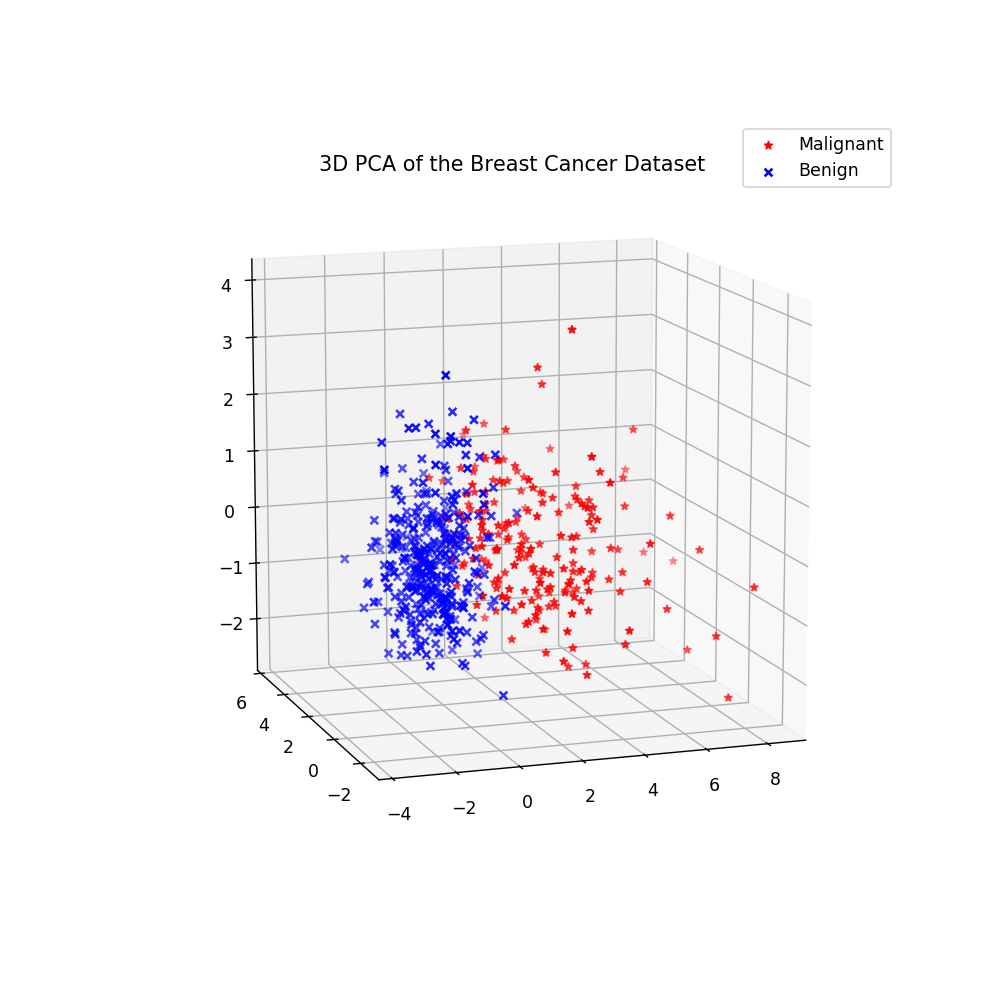

In [8]:
plot_sk_pca()

### <img src="https://img.icons8.com/color/96/000000/winrar.png" style="height:50px;display:inline"> PCA for Compression
---
* The projection matrix is a matrix composed of the data projected onto the top-K eigenvectors.
* To get a better understanding of the dimensionality reduction quality, we observe the trade-off between the compression and the reconstruction error.
    * The more compression (that is, lower dimension) the larger the reconstruction error and the representation quality is degraded (as our new features don't represent the original data faithfully).

* Measuring the normalized reconstruction error:
    * Denote the top-K eigenvector matrix: $W_k \in \mathcal{R}^{m \times k}$
    * The projection: $Z = XW_K \in \mathcal{R}^{n \times k}$
    * The reconstruction: $\tilde{X} = ZW_k^T = XW_kW_k^T \in \mathcal{R}^{N \times m}$
    * Measure the error by the **Matrix Norm: Frobenius Norm**: $$||M||^2_F = \sum_{ij} M_{ij}^2 \rightarrow ||A - B||^2_F = \sum_{ij} (A_{ij} - B_{ij})^2$$
    * The normalized reconstruction error: $$ err_k = \frac{||XW_kW_k^T - X||^2_F}{||X||^2_F} $$
* How to pick $k$?
    * As a rule of thumb we take the amount of eigenvectors that allows no more than 1% reconstruction error

In [9]:
X_normalized = X - X.mean(axis=0, keepdims=True)
X_norm = np.linalg.norm(X_normalized, ord='fro')
# calculate the covariance matrix
A = X_normalized.T @ X_normalized  # x in [N x m]
d, v = np.linalg.eig(A)
# sort by decreasing order
v = v[:,np.argsort(-d)]
d = d[np.argsort(-d)]
for k in range(1, X_normalized.shape[1] + 1):
    Z = X_normalized @ v[:,:k]
    err = np.square(np.linalg.norm(Z @ v[:,:k].T - X_normalized, ord='fro') / X_norm)
    print("number of eigenvectors (k): {}, reconstruction error: {}".format(k, err))

number of eigenvectors (k): 1, reconstruction error: 0.3817772746473096
number of eigenvectors (k): 2, reconstruction error: 0.18251649332420763
number of eigenvectors (k): 3, reconstruction error: 0.061153584222750024
number of eigenvectors (k): 4, reconstruction error: 0.014432620496369605
number of eigenvectors (k): 5, reconstruction error: 0.002089071617164215
number of eigenvectors (k): 6, reconstruction error: 4.1709202569973447e-05
number of eigenvectors (k): 7, reconstruction error: 3.4934265607613812e-31


In [12]:
def plot_pca_recon_error(X, v, d):
    k_s = list(range(X.shape[1]))
    X_norm = np.linalg.norm(X, ord='fro')
    errs = []
    for k in k_s:
        Z = X @ v[:,:k]
        err = np.square(np.linalg.norm(Z @ v[:,:k].T - X, ord='fro') / X_norm)
        errs.append(err)
    fig = plt.figure(figsize=(8, 5))
    ax = fig.add_subplot(111)
    ax.plot(k_s, errs)
    ax.grid()
    ax.set_xlabel("number of eigenvectors (K)")
    ax.set_ylabel("error")
    ax.set_title("reconstruction error vs. number of eigenvectors (K)")
    ax.set_ylim([0, 0.4])

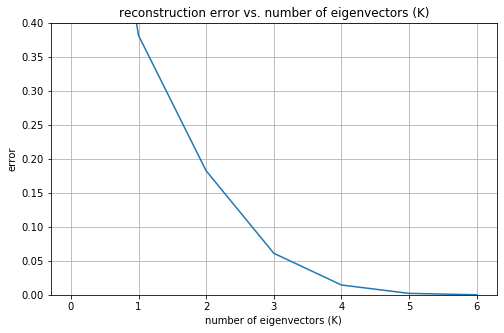

In [13]:
%matplotlib inline
plot_pca_recon_error(X_normalized, v, d)

### <img src="https://img.icons8.com/office/80/000000/fantasy.png" style="height:50px;display:inline"> The Transpose Trick
---
* What happens when the number of features is very large and much larger than the number of samples, that is, $m >> N$?
    * Calculating the $m \times m$ covariance matrix is computationally expensive ($O(m^2N)$).
* **The Transpose Trick**: ($X \in \mathcal{R}^{m \times N}$)
    * Instead of calculating the eigenvalues and eigenvectors of $\frac{1}{N}XX^T$ we compute the eigenvalues and eigenvectors of $$ \frac{1}{m} X^TX $$
    * *Why???*
        * If $v$ is an eigenvector of $XX^T$, then: $$ XX^Tv = \lambda v $$
        * Left-multiplying by $X^T$, we get $$ X^TX (X^Tv) = \lambda (X^Tv) $$
            * $\rightarrow X^Tv$ is an **eigenvector** of $X^TX$ with **eigenvalue** $\lambda$. 
        * In order to compute $v$, which is really what we want:
            * Denote the eigenvector of $X^TX$ by $w$.
            * We get: $$ Xw =XX^Tv = \lambda v \rightarrow v = \lambda^{-1}Xw  $$

### <img src="https://img.icons8.com/dusk/64/000000/trust.png" style="height:50px;display:inline"> The Relationship Between PCA & SVD
---
* The PCA viewpoint requires that one compute the eigenvalues and eigenvectors of the covariance matrix, which is the product $XX^T$, where $X$ is the data matrix. Since the covariance matrix is symmetric, the matrix is diagonalizable, and the eigenvectors can be normalized such that they are orthonormal: $XX^T = WAW^T$

* On the other hand, applying SVD to the data matrix $X$ as follows: $X=U\Sigma V^T$, and attempting to construct the covariance matrix from this decomposition gives: $$XX^T = (U\Sigma V^T)(U \Sigma V^T)^T = U \Sigma^2 U^T $$ the last transition is due to $V$ being orthonormal ($VV^T = I$). Thus, the square roots of the eigenvalues of $XX^T$ are the singular values of $X$.
* Using the SVD to perform PCA makes much better sense numerically than forming the covariance matrix to begin with, since the formation of $XX^⊤$ can cause loss of precision. But performing SVD is slower.

### <img src="https://img.icons8.com/color/48/000000/critical-thinking.png" style="height:50px;display:inline"> PCA as Dimensionality Reduction Technique
---
* **Pro**: Optimal reconstruction error in Frobenius norm
* **Con**: Interpretability problem - features lose their previous meaning
    * A singular vector specifies a linear combination of all input columns or rows
    * PCA is **sensitive to outliers** since it is minimizing $l_2$ norms. The squaring of deviations from the outliers, they will dominate the total norm and therefore will drive the PCA components.
* **When will PCA work?**
    * PCA assumes **linear** realtionships among variables
    * Clouds of points in *p*-dimensional space has linear dimensions that can be effectively summarized by the principal axes
    * If the structure in the data is **non-linear** (the cloud of points twists and curves its way through *p*-dimensional space), the principal axes will not be an efficient and informative summary of the data.

## <img src="https://img.icons8.com/color/96/000000/the-earths-inner-core.png" style="height:50px;display:inline"> Kernels Motivation 
---
* The main shortcoming of PCA is that it is unable to capture nonlinear structures in the data.
* Consider the following example of linearly inseparatable 1-D set of exmaples and then extracting polynimial (second order) features:

In [14]:
def plot_kernel_example():
    x_1 = np.random.randint(0,6, size=(3,))
    x_2 = np.random.randint(8,14, size=(3,))
    x_3 = np.random.randint(20,25, size=(3,))

    x_1_p = x_1 ** 2
    x_2_p = x_2 ** 2
    x_3_p = x_3 ** 2

    x_class = np.linspace(0, 30, 400)
    y_class = 25 * x_class - 130

    fig = plt.figure(figsize=(8,5))
    ax_1 = fig.add_subplot(211)
    ax_1.scatter(x_1, np.zeros_like(x_1), marker='*', color='b')
    ax_1.scatter(x_2, np.zeros_like(x_2), marker='^', color='r')
    ax_1.scatter(x_3, np.zeros_like(x_3), marker='*', color='b')
    ax_1.grid()
    ax_2 = fig.add_subplot(212)
    ax_2.scatter(x_1, x_1_p, marker='*', color='b')
    ax_2.scatter(x_2, x_2_p, marker='^', color='r')
    ax_2.scatter(x_3, x_3_p, marker='*', color='b')
    ax_2.plot(x_class, y_class)
    ax_2.grid()

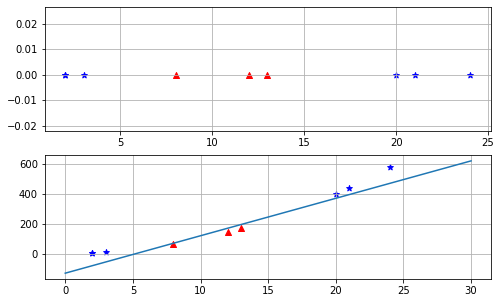

In [15]:
plot_kernel_example()

* Adding polynomial features is simple to implement and can work great with all sorts of ML algorithms.
* At a **low polynomial** degree it cannot deal with more complex datasets.
* At a **high polynomial** degree there are a lot of features, which makes the computation very slow.
    * Computation in the feature space can be costly because it is high dimensional (even go to infinity).
* **The Kernel Trick** comes to the rescue!
    * It makes it possible to get the same result as if you added many features (even in high dimension), **without actually adding them**!
        * So there is no computational disaster resulting from the large number of features.

### <img src="https://img.icons8.com/dusk/64/000000/witch.png" style="height:50px;display:inline"> The Kernel Trick
---
* When the **data points**, $\{x^{(i)}\}_{i=1}^m$, only appear as **inner (dot) products** - $(x^{(i)})^Tx^{(j)}$, we can apply the kernel trick.
* As long as we can calculate the inner product in the **feature space**, we don't need the mapping explicitly.
    * The kernel function, denoted $K(x^{(i)}, x^{(j)}) = \phi(x^{(i)})^T\phi(x^{(j)})$, stands for the inner product in the feature space, and can easily plugged into the optimization.
    * If we could find a function $K(x^{(i)}, x^{(j)})$ that is simple enough, we can actually save us the huge number of calculations required to calculate $\phi(x^{(i)})^T\phi(x^{(j)})$, or even prevent us from the feature extraction itself, $\phi(x)$, this is the **kernel trick**.

* There are no restrictions on the form of $x^{(i)}, x^{(j)}$, but there are restrictions on the kernel function $K(x^{(i)}, x^{(j)})$
    * $K(x^{(i)}, x^{(j)})$ must satisfy the **Mercer Condition** - the $n \times n$ kernel matrix $K(x^{(i)}, x^{(j)})$ is **PSD**
    * This implies that the quadratic optimization is convex
        * It has a uniuqe solution and can be solved efficiently
* **Mercer's Theorem**: *Suppose that $k(x,y)$ is a symmetric real valued function such that $k(x,y) \leq C$ for some $C>0$. Suppose the linear operator* $$ \mathcal{L}(f)(x) = \int_{\mathcal{R}^D} k(x,y)f(y)dy $$ is PSD, that is $$ \int\int_{\mathcal{R}^D} k(x,y)f(y)dydx \geq 0 $$ Let $\psi_i$ be the normalized orthogonal eigenfunctions of $\mathcal{L}$, associated with eigenvalues $\lambda_i >0$, sorted in non-decreasing order, and let $m$ be the number of non-zero eigenvalues. 
* Then, the sequence of eigenvalues is summable, namely $\sum_i \mid \lambda_i \mid < \infty$, and the kernel can be expressed as $$ k(x,y) = \sum_{i=1}^m \lambda_i \psi_i(x)\psi_i(y) $$ 
* *We thus see that by choosing $\phi_i(x) = \sqrt{\lambda_i} \psi_i(x)$, a feature based representation is obtained.*

### <img src="https://img.icons8.com/office/80/000000/cool.png" style="height:50px;display:inline"> The Kernel Trick - Polynomial Kernel Example
---
* We will now demonstrate the kernel trick for a $2^{nd}$-degree polynomial mapping
* Suppose the feature mapping (or extraction) is defined as follows: $$ \phi(u)=\phi(\begin{bmatrix} u_1 \\ u_2 \end{bmatrix}) = \begin{bmatrix} 1 \\ \sqrt{2}u_1 \\ \sqrt{2}u_2\\ \sqrt{2}u_1u_2 \\ u_1^2 \\ u_2^2 \end{bmatrix} $$

* The inner product $\phi(u)^T\phi(v)$: $$\phi(u)^T\phi(v) = 1 + 2u_1v_1 + 2u_2v_2 + 2u_1u_2v_1v_2 +u_1^2v_1^2 + u_2^2v_2^2 = (1 + u_1v_1 + u_2v_2)^2 = (1 + u^Tv)^2$$
    * **HOW ABOUT THAT?** - We just found out that we can calculate $\phi(u)^T\phi(v)$ just by calculating the input inner product $u^Tv$ and plugging it in $(1 + u^Tv)^2$, thus saving us the whole feature mapping calculation process!
* We define **the $2^{nd}$ polynomial kernel**: $$ K(u,v) = (1 + u^Tv)^2 $$
    * No need to calculate $\phi(u)^T\phi(v)$ explicitly!
    * The use of kernel function to avoid computing $\phi(\cdot)$ explicitly is known as **the kernel trick**

### <img src="https://img.icons8.com/color/96/000000/transformer.png" style="height:50px;display:inline"> Other Kernel Functions
---
* Linear kernel: $$ K(u,v) = u^Tv $$
* Polynomial kernel with degree $d$: $$ K(u,v) = (\alpha u^Tv + \beta)^d $$
    * The feature space is all monomials up to degree $d$

* **Radial Basis Function** (Gaussian RBF) kernel with width $\sigma$: $$ K(u,v) = e^{-\frac{||u-v||^2}{2\sigma^2}} = e^{-\gamma|| u-v ||^2} = exp(-\gamma|| u-v ||^2) $$
    * It is also a type of a *similarity function* that measures *how far are two points?*
    * RBF covers the space with "balls" of a fixed radius, where the centers are the support vectors (in SVM).
    * The radius of the "balls" is determined by the parameter $\gamma = \frac{1}{2\sigma^2}$
        * A **smaller** $\gamma$ means a larger radius, a lower "model complexity"
        * A **larger** $\gamma$ means a smaller radius, a finer grain coverage which may possibly lead to overfitting.
    * The feature space is **infinite-dimensional** (hint for HW: expand the exponential to an infinite series using Taylor).
    
* Sigmoid kernel, with parameters $\kappa$ and $\theta$: $$ K(u,v) = tanh(\kappa u^Tv + \theta) $$
    * It does not satisfy the *Mercer* condition on all $\kappa, \theta$

* Techniques for constructing new kernels (from *Pattern Recognition and Machine Learning*, C.Bishop): <img src="./assets/tut_xi_kernels.PNG" style="height:300px">

#### <img src="https://img.icons8.com/dusk/64/000000/task.png" style="height:30px;display:inline"> Exercise - Valid Kernels
---
Let $k_1(x,y)$ and $k_2(x,y)$ be valid kernels according to Mercer's theorem (that is, they represent an inner product in some transformed space). Prove that the following functions are valid kernels as well:

1. Prove: $$k(x,y) = k_1(x,y) + k_2(x,y)$$

2. Prove: $$k(x,y) = f(x)k_1(x,y)f(y) \: \:\text{where} \: \: f: \mathcal{R}^D \to \mathcal{R}$$

#### <img src="https://img.icons8.com/dusk/64/000000/idea.png" style="height:30px;display:inline"> Solution
---
The basic trick here is using the initial knowledge that both kernels are valid according to Mercer's theorem.

#### Section 1
* Prove for: $$k(x,y) = k_1(x,y) + k_2(x,y)$$

Using Mercer's theorem we know that there exists mappings $\phi_1(x)$ and $\phi_2(x)$ such that: $$ k_1(x,y) = \phi_1(x)^T \phi_1(y) $$ $$ k_2(x,y) = \phi_2(x)^T \phi_2(y) $$
Thus, $$ k(x,y) = k_1(x,y) + k_2(x,y) $$ $$ = \phi_1(x)^T \phi_1(y) + \phi_2(x)^T \phi_2(y) $$ $$ = [\phi_1(x), \phi_2(x)]^T[\phi_1(y), \phi_2(y)] = \Phi(x)^T\Phi(y) $$
   * $[\phi_1(x), \phi_2(x)]$ is a concatentanion of the vectors $\phi_1(x), \phi_2(x)$: $$\begin{bmatrix} \phi_{11}(x) & ... &\phi_{1n}(x) & \phi_{21}(x) & ... & \phi_{2m}(x) \end{bmatrix}^T$$
   * Thus, $k(x,y)$ represents an inner product in some transformed space.

#### Section 2

* Prove for: $$k(x,y) = f(x)k_1(x,y)f(y) \: \:\text{where} \: \: f: \mathcal{R}^D \to \mathcal{R}$$

Again, using Mercer's theorem: $$ k(x,y) =  f(x)k_1(x,y)f(y)$$ $$ =f(x)\phi_1(x)^T\phi_1(y)f(y) $$ $$ = \Phi(x)^T \Phi(y) $$ where $\Phi(x) = f(x)\phi_1(x)$.
   * Recall that $\phi_1(x)$ is a vector and $f(x)$ is a **scalar**.
   * Thus, $k(x,y)$ represents an inner product in some transformed space.

## <img src="https://img.icons8.com/officel/80/000000/galaxy.png" style="height:50px;display:inline">Nonlinear PCA - NLPCA (& Kernel PCA)
---
* The main shortcoming of PCA is that it is **unable to capture nonlinear structures in the data**.
* The basic idea behind Kernel PCA is that by embedding the data into a high-dimensional space for which linear sub-spaces capture the relavant structures.
* Mathematically: $$ x \in \mathcal{R}^D \xrightarrow{\text{nonlinear}} \phi(x) \in \mathcal{R}^m \xrightarrow{\text{linear}} y\in \mathcal{R}^d, m \geq D > d $$
(and usually $m >> D$)

* The basic steps of Nonlinear PCA:
    * Using the mapping $\phi(x)$, we map each data point $x_i \rightarrow \phi(x_i), \: i=1,...,n$.
    * As in regular PCA, we center (or normalize/standartize) the data. We define: $$ \Phi = \big(\phi(x_1)-\overline{\phi}, ..., \phi(x_n) - \overline{\phi} \big) \in \mathcal{R}^{m \times n}$$ $$ \overline{\phi} = \frac{1}{n}\sum_{j=1}^n \phi(x_j) $$
    * Define the sample covariance matrix: $$ \hat{P}_{\phi(x)} = \frac{1}{n} \sum_{j=1}^n \big(\phi(x_j) - \overline{\phi} \big) \big(\phi(x_j) - \overline{\phi} \big)^T = \frac{1}{n} \Phi\Phi^T \in \mathcal{R}^{m \times m} $$
    * Perform the *eigen-decomposition* of the sample covariance matrix: $$ \hat{P}_{\phi(x)} u_i = \lambda_i u_i, \: i=1,...,m $$
        * The $d$ *nonlinear* Principal Components (PCs): $$ y_i = u_i^T \big(\phi(x) -\overline{\phi} \big) \in \mathcal{R}, \: u_i \in \mathcal{R}^m, \: i=1,...,d $$

* Compuational cost:
    * Computing the eigenvectors of a $m \times m$ matrix requires (in general) $O(m^3)$ steps - very expensive for large $m$!
* **Note** - the features $\phi(x_i)$ need to be centered even if the $x_i$ are centered, since the mapping $\phi$ is **nonlinear**.
* Reducing the computational cost using the **Transpose Trick**:
    * The dimension $m$ of the feature space may be very large which may be very expensive computationally.
    * Using the *transpose trick* which is based on the relation between the eigen-decomposition of $\Phi\Phi^T$ and $\Phi^T\Phi$, we can reduce the cost.
        * Recall the the **eigenvalues** of $\Phi\Phi^T$ and $\Phi^T\Phi$ are equal.
    * Doing the same derivation as before (look up...) we get that if $w$ is an eigen-vector of $\Phi^T\Phi$ and $v$ is  an eigen-vector of $\Phi\Phi^T$ then: $$ u = \lambda^{-1} \Phi w $$
        * It is much cheaper to compute as the number of samples $n << m$.
    * The $d$ *nonlinear* Principal Components (PCs): $$ y_i = u_i^T \big(\phi(x) -\overline{\phi} \big) = \lambda^{-1}_{i} w_i^T\Phi^T\big(\phi(x) -\overline{\phi} \big) \in \mathcal{R}, u_i \in \mathcal{R}^m,\: i=1,...,d $$

### <img src="https://img.icons8.com/dusk/64/000000/greentech.png" style="height:50px;display:inline"> Kernel PCA
---
* Notice that the nonlinear PCs only require the computation of *inner products* between the features $\phi$. This indicates that we can use **the kernel trick** to calculate these inner products.
* We define the kernel and *centered kernel functions*: $$ k(x,y) = \phi(x)^T\phi(y)$$ $$ \tilde{k}(x,y) = \big(\phi(x) -\overline{\phi} \big)^T\big(\phi(y) -\overline{\phi} \big) $$
    * Note that: $$ \tilde{k}(x,y) = k(x,y) -\frac{1}{n}\sum_{j=1}^nk(x,x_j) -\frac{1}{n}\sum_{i=1}^nk(x_i,y) + \frac{1}{n^2}\sum_{i=1}^n \sum_{j=1}^n k(x_i, y_j)$$
    * Define the kernel and centered *kernel matrices*, which are defined w.r.t. the data points: $$ K=\big[k_{ij}\big], \: \: k_{ij}=k(x_i, x_j) $$ $$ \tilde{K} = \Phi^T\Phi = \big[\tilde{k}_{ij} \big], \: \: \tilde{k}_{ij} = \tilde{k}(x_i, x_j) $$

#### Claim

**The nonlinear PCs can be computed directly in terms of the matrix $\tilde{K}$.**

* It can be shown that: $$ \tilde{K} = \big(I -\frac{1}{n}\mathbb{1}\mathbb{1}^T \big)K\big(I -\frac{1}{n}\mathbb{1}\mathbb{1}^T \big) = JKJ $$
    * $\mathbb{1} = (1, 1, ..., 1)^T \in \mathcal{R}^{n}$


* We also define the vectors: $$ k_x = [k(x_1, x), ..., k(x_n,x)]^T $$ $$\tilde{k_x} = \Phi^T (\phi(x) - \overline{\phi}) = [\tilde{k}(x_1,x), ..., \tilde{k}(x_n, x)]^T $$
* The nonlinear PCs can then be computed as: $$ y_i = w_i^T\Phi^T\big(\phi(x) -\overline{\phi} \big) = w_i^T\tilde{k}_x, \: \: i=1,2,...,d $$
    * $w_i$ are the **eignevectors** of $\tilde{K}$: $$ \tilde{K}w_i = \lambda_iw_i $$ $$ ||w_i||^2=\lambda_i^{-1}, \: \: [w_1, ...,w_d] = V_d\Lambda_d^{-\frac{1}{2}} $$
    * $V_d$ and $\Lambda_d$ are obtained from the top-$d$ eigenvectors of $\tilde{K}$'s eigen-decomposition: $$ \tilde{K} = V_{\tilde{K}}\Lambda_{\tilde{K}}V_{\tilde{K}}^T $$
    * Concatenating the components $y_i$ we get (the projection): $$Y = (y_1, y_2, ...,y_d)^T = \Lambda_d^{-\frac{1}{2}}V_d^T\tilde{K} $$

        * Notice that $\Lambda_d^{-\frac{1}{2}}$ is the normaliztion factor (recall that $\Lambda_d$ is a diagonal matrix with the eigenvalues on the diagonal).

* The low-dimensional nonlinear representation is obtained from the top-$d$ eigenvectors of the matrix $\tilde{K}$.
    * The problem has been solved in the high-dimensional feature space $\phi$ while not explicitly computing $\phi$ or even working in $\mathcal{R}^m$

#### NLPCA Algorithm (Kernel PCA - KPCA)
---
* **Input**: A set of points $\mathcal{X} = \{x_1, x_2, ..., x_N \} \subset \mathcal{R}^D$, and a mapping $\phi: \mathcal{R}^D \rightarrow \mathcal{R}^M$ **or** a symmetric positive definite kernel function $\mathcal{k}: \mathcal{R}^D \times \mathcal{R}^D \rightarrow \mathcal{R}$

  1. Compute $\overline{\phi} = \frac{1}{N}\sum_j \phi(x_j)$ and the centered embedded data matrix $\Phi$ **or** the kernel matrix $K$. 
  2. Compute the centered kernel *matrix*: $$\tilde{\mathcal{K}} = \Phi^T\Phi \text{ or }  \tilde{\mathcal{K}} = \big(I -\frac{1}{n}\mathbb{1}\mathbb{1}^T \big)K\big(I -\frac{1}{n}\mathbb{1}\mathbb{1}^T \big) = JKJ \text{ or } \big(\tilde{\mathcal{k}}(x_i, x_j) \big) \in \mathcal{R}^{N \times N} $$
  3. Compute the eigenvectors $w_i \in \mathcal{R}^N$ of $\tilde{\mathcal{K}}$: $$ \tilde{\mathcal{K}} w_i = \lambda_iw_i $$ and normalize so that $||w_i||^2 = \lambda_i^{-1}$ (can be done as in step 4).
      * For every data point $x$, its $i^{th}$ nonlinear principal component is given by: $$ y_i = w_i^T\Phi^T(\phi(x) - \overline{\phi}) \text{ or } w_i^T[\tilde{\mathcal{k}}(x_1, x), ..., \tilde{\mathcal{k}}(x_N, x)]^T $$ for $i=1,2,...,d$
  4. The projection is given by: $$Y = (y_1, y_2, ...,y_d)^T = \Lambda_d^{-\frac{1}{2}}V_d^T\tilde{K} $$

* **Output**: A set of points $\{y_j\}_{j=1}^N$ lying in $\mathcal{R}^d$, where $y_{ij}$ in the $i^{th}$ nonlinear principal component of $x_j$ for $i=1,...,d$ and $j=1,...,N$

In [4]:
def plot_circles_example():
    # example - circles
    X, y = make_circles(n_samples=1000, random_state=123, noise=0.1, factor=0.2)
    pca = PCA(n_components=2)
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)  # Radial Basis Function kernel
    X_pca = pca.fit_transform(X)
    X_kpca = kpca.fit_transform(X)

    # plot
    fig = plt.figure(figsize=(10,4))

    # original data
    ax1 = fig.add_subplot(1,3,1)
    ax1.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
    ax1.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax1.grid()
    ax1.set_title("original data")

    # pca
    ax2 = fig.add_subplot(1,3,2)
    ax2.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', marker='^', alpha=0.5)
    ax2.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax2.grid()
    ax2.set_title("PCA")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    # kpca
    ax3 = fig.add_subplot(1,3,3)
    ax3.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
    ax3.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax3.grid()
    ax3.set_title("KPCA")
    ax3.set_xlabel("PC1")
    ax3.set_ylabel("PC2")

    plt.tight_layout()

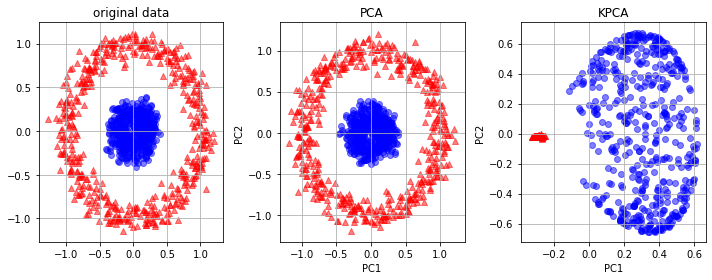

In [5]:
plot_circles_example()

In [6]:
def plot_moons_example():
    # example - moons
    X, y = make_moons(n_samples=100, random_state=123)
    pca = PCA(n_components=2)
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=15)  # Radial Basis Function kernel
    X_pca = pca.fit_transform(X)
    X_kpca = kpca.fit_transform(X)

    # plot
    fig = plt.figure(figsize=(10,4))

    # original data
    ax1 = fig.add_subplot(1,3,1)
    ax1.scatter(X[y==0, 0], X[y==0, 1], color='red', marker='^', alpha=0.5)
    ax1.scatter(X[y==1, 0], X[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax1.grid()
    ax1.set_title("original data")

    # pca
    ax2 = fig.add_subplot(1,3,2)
    ax2.scatter(X_pca[y==0, 0], X_pca[y==0, 1], color='red', marker='^', alpha=0.5)
    ax2.scatter(X_pca[y==1, 0], X_pca[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax2.grid()
    ax2.set_title("PCA")
    ax2.set_xlabel("PC1")
    ax2.set_ylabel("PC2")

    # kpca
    ax3 = fig.add_subplot(1,3,3)
    ax3.scatter(X_kpca[y==0, 0], X_kpca[y==0, 1], color='red', marker='^', alpha=0.5)
    ax3.scatter(X_kpca[y==1, 0], X_kpca[y==1, 1], color='blue', marker='o', alpha=0.5)
    ax3.grid()
    ax3.set_title("KPCA")
    ax3.set_xlabel("PC1")
    ax3.set_ylabel("PC2")

    plt.tight_layout()

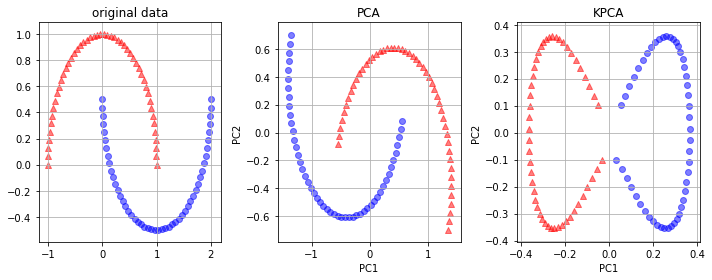

In [7]:
plot_moons_example()

### <img src="https://img.icons8.com/bubbles/50/000000/video-playlist.png" style="height:50px;display:inline"> Recommended Videos
---
#### <img src="https://img.icons8.com/cute-clipart/64/000000/warning-shield.png" style="height:30px;display:inline"> Warning!
* These videos do not replace the lectures and tutorials.
* Please use these to get a better understanding of the material, and not as an alternative to the written material.

#### Video By Subject

* PCA (1) - <a href="https://www.youtube.com/watch?v=FgakZw6K1QQ">StatQuest: Principal Component Analysis (PCA), Step-by-Step</a>
* PCA (2) - <a href="https://www.youtube.com/watch?v=TJdH6rPA-TI">Principal Component Analysis (PCA) - Computerphile</a>
* The Kernel Trick - <a href="https://www.youtube.com/watch?v=JiM_LXpAtLc">Machine Learning Fundamentals - The Kernel Trick</a>
* Kernel PCA - <a href="https://www.youtube.com/watch?v=HbDHohXPLnU">David Thompson: Nonlinear Dimensionality Reduction: KPCA</a>

## <img src="https://img.icons8.com/dusk/50/000000/prize.png" style="height:50px;display:inline"> Credits
---
* Icons from <a href="https://icons8.com/">Icon8.com</a> - https://icons8.com
* Datasets from <a href="https://www.kaggle.com/">Kaggle</a> - https://www.kaggle.com/